# Week 2

The goal of this second week is to get a first glance at the Courant Snyder parameters

These parameters are dependant on the length $L$ of the FODO cell and the gradient of magnetic field $\frac{\partial B_{y}}{\partial x}$. We will make the assummpitonWhen we take the limit of quadrupoles being thin lenses (thus thin $L$), we get the following equations


We set the value $k_1$, which  is a function of $s$ that characterises the focusing at each point along the beam line. In a drift space, for example, $k_1 = 0$ since the momentum of a particle will be constant. In a quadrupole, in the approximation:
$p_x \approx x_0$ :


$$\begin{array}{c}
L \rightarrow 0 \\
k_{1} L \rightarrow \frac{1}{f} \\
k_{1}=\frac{q}{P_{0}} \frac{\partial B_{y}}{\partial x}
\end{array}$$

$B_y(s)$ is the vertical component of the magnetic field

$P_0 = \beta_0\gamma_0 mc$ is the initial canonical momentum. Moreover, $\beta\gamma = \sqrt{\gamma^2-1}$ and $\gamma = \frac{E}{mc^2}$.
$q$ is the charge of the particle we consider.


In [1]:
import numpy as np
import math as m
import pandas
from matplotlib import pyplot as plt

In [18]:
E_e = 45 ; # energy of the positron in GeV
E_mu = 22 ; # energy of the muon in GeV

q_e = 1; #charge of a positron in units of an electron charge
q_mu = -1; #charge of a muon in units of an electron charge

m_e = 0.511*10**(-3); # mass of the positron in GeV/c^2
m_mu = 0.10565; # mass of the muon in GeV/c^2


gamma_e = E_e/(m_e) # c = 1
gamma_mu = E_mu/(m_mu) # c = 1

L = 1; # length in meters TO BE SET
f = np.sqrt(2); # focal length
k_1 = 1/(f*L); # k_1 in a quadrupole
k_1_drift = 0 # k_1 in a drift region
P_e = m_e*np.sqrt(gamma_e**2 - 1) # canonical momentum of the positron in GeV/c

dB = P_e/q_e*k_1; # gradient of magnetic field




The transfer matrix for a quadrupole is the following
$$R_{\mathrm{F}}=\left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
-\frac{1}{f} & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{f} & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

The transfer matrix for a drift portion is the following

$$R_{\mathrm{drift}}=\left(\begin{array}{cccccc}
1 & L & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & L & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & \frac{L}{\beta_{0}^{2} \gamma_{0}^{2}} \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

For an entire FODO cell, with a starting point $s=s_0$ (entrance of the focusing quadrupole), we get the matrix $R = R_{drift}R_D R_{drift} R_F = R=\left(\begin{array}{ccc}
R_{x} & 0 & 0 \\
0 & R_{y} & 0 \\
0 & 0 & R_{z}
\end{array}\right)$

Where 
$$ R_{x}=\left(\begin{array}{cc}
1-\frac{L}{f}\left(1+\frac{L}{f}\right) & \frac{L}{f}(2 f+L) \\
-\frac{L}{f^{2}} & 1+\frac{L}{f}
\end{array}\right) \qquad R_{y}=\left(\begin{array}{cc}
1+\frac{L}{f}\left(1-\frac{L}{f}\right) & \frac{L}{f}(2 f-L) \\
-\frac{L}{f^{2}} & 1-\frac{L}{f} \end{array}\right)  \qquad R_{z}=\left(\begin{array}{ll}
1 & \frac{2 L}{\beta_{0}^{2} \gamma_{0}^{2}} \\
0 & 1 \end{array}\right)
$$

Notice that the $R_y$, which represents the defocusing plane is the same matrix that $R_x$ the focusing plane, with $f$ set to $-f$, which makes sense from an optical point of view.

In [19]:
# Building the transfer matrix of the FODO cell
Rx1 = 1 - L/f*(1+f); 
Rx2 = L/f*(2*f+L);
Rx3 = -L/(f**2);
Rx4 = 1+L/f;

Ry1 = 1 + L/f*(1-f); 
Ry2 = L/f*(2*f-L);
Ry3 = -L/f**2;
Ry4 = 1-L/f;

Rx = np.matrix([[Rx1, Rx2],
      [Rx3, Rx4]]);
Ry = np.matrix([[Ry1, Ry2],
      [Ry3, Ry4]]);
Rz = np.matrix([[1, 2*L/(gamma_e**1 -1)],
      [0, 1]]); # because gamma*beta = sqrt(gamma^2 - 1)



Now we want the coefficients. We will for that use the reference book *Beam Dynamics in High Energy Particle Accelerators* to get the appropriate formulas.

We know that in our case (a particle propagating in the x direction as its longitudinal direction), $ Tr(R_x) = 2 cos(\mu_x) $ where $\mu_x$ is the betatron phase advance. The trace is an invariant under changing the starting point, so does the phase advance.



We have the formula 

$$R_{x}=\left(\begin{array}{cc}
\cos \mu_{x}+\alpha_{x} \sin \mu_{x} & \beta_{x} \sin \mu_{x} \\
-\gamma_{x} \sin \mu_{x} & \cos \mu_{x}-\alpha_{x} \sin \mu_{x}
\end{array}\right)$$

Which allows us to find the values of the Courant Snyder parameters, using only the values found for $R_x$ and the value calculated for $\mu_x$.

In [20]:
# the coefficients at the focusing quadrupole
tr= np.asscalar(Rx.trace());
mu_x = m.acos(tr/2) ;
alpha_x0 = (Rx1 -np.cos(mu_x))/np.sin(mu_x);
beta_x0 = Rx2/np.sin(mu_x);
gamma_x0 = -Rx3/np.sin(mu_x);


# the coefficients at the defocusing quadrupole
tr= np.asscalar(Ry.trace());
mu_y = m.acos(tr/2) ;
alpha_y0 = (Ry1 -np.cos(mu_y))/np.sin(mu_y);
beta_y0 = Ry2/np.sin(mu_y);
gamma_y0 = -Ry3/np.sin(mu_y);


<ipython-input-20-a4cf88dc9a55>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Rx.trace());
<ipython-input-20-a4cf88dc9a55>:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


$$R(s_1,s_0) = \left(\begin{array}{cc}
\sqrt{\frac{\beta_{x 1}}{\beta_{x 0}}}\left(\cos \mu_{x}+\alpha_{x 0} \sin \mu_{x}\right) & \sqrt{\beta_{x 0} \beta_{x 1}} \sin \mu_{x} \\
\frac{\alpha_{x 0}-\alpha_{x 1}}{\sqrt{\beta_{x 0} \beta_{x 1}}} \cos \mu_{x}-\frac{1+\alpha_{x 0} \alpha_{x 1}}{\sqrt{\beta_{x 0} \beta_{x 1}}} \sin \mu_{x} & \sqrt{\frac{\beta_{x 0}}{\beta_{x 1}}}\left(\cos \mu_{x}-\alpha_{x 1} \sin \mu_{x}\right)
\end{array}\right)$$



To get the evolution of the parameters in the FODO lattice, we have to get the evolution of the parameters in the drift space, we can write the transfer matrix over a distance $s$ (4.90):

$$R_{x}=\left(\begin{array}{ll}
1 & s \\
0 & 1
\end{array}\right)$$

Then, performing the matrix multiplication in (4.29), we find:

$$\begin{array}{l}
\beta_{x}(s)=\beta_{x 0}+\frac{s^{2}}{\beta_{x 0}} \\
\alpha_{x}(s)=-\frac{s}{\beta_{x 0}}
\end{array}$$

The $\beta_{x0}$ depends on which drift space we consider. If we consider the $\beta_{y 0}$ calculated earlier.

Moreover we have the equation (4.74) which gives us $\beta_x \gamma_x - \alpha_x^2 = -1$, this gives 



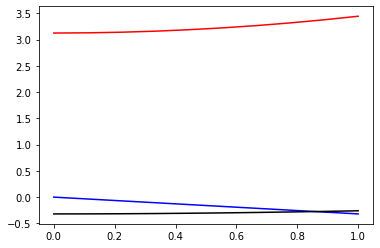

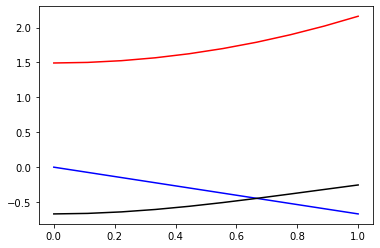

In [21]:
# we are going to devide the 
s = np.linspace(0,1,10);

beta_FD =  [beta_x0 + x**2/beta_x0 for x in s] ;#beta in the drift following the focusing quadrupole
alpha_FD =  [- x/beta_x0 for x in s];
gamma_FD = np.zeros(10);
for i in range(10) :
    gamma_FD[i] = (-1 + alpha_FD[i]**2)/beta_FD[i]
    

    
beta_DD =  [beta_y0 + x**2/beta_y0 for x in s] #beta in the drift following the defocusing quadrupole
alpha_DD =  [- x/beta_y0 for x in s]
gamma_DD = np.zeros(10);
for i in range(10) :
    gamma_DD[i] = (-1 + alpha_DD[i]**2)/beta_DD[i]


Fig = plt.figure()
plt.plot(s,beta_FD,'r',label = 'beta')
plt.plot(s,alpha_FD,'b',label = 'alpha')
plt.plot(s,gamma_FD,'k',label = 'gamma')



Fig = plt.figure()
plt.plot(s,beta_DD,'r',label = 'beta')
plt.plot(s,alpha_DD,'b',label = 'alpha')
plt.plot(s,gamma_DD,'k',label = 'gamma')


The action variable is : 
$$J_{x}=\frac{1}{2}\left(\begin{array}{l} x  & p_{x} \end{array}\right) A_{x}\left(\begin{array}{c}
x \\
p_{x}
\end{array}\right)
$$

also written $J_x = \frac{1}{2}(\gamma_x x^2 + 2 \alpha_x x p_x + \beta_x p_x^2)$ and should be invariant along the beam line (to be verified)

The angle variable is : $\tan \phi_{x}=-\beta_{x} \frac{p_{x}}{x}-\alpha_{x}$

The coordinates along the $x$ axis can be expressed as 
$$\begin{aligned}
x &=\sqrt{2 \beta_{x} J_{x}} \cos \phi_{x} \\
p_{x} &=-\sqrt{\frac{2 J_{x}}{\beta_{x}}}\left(\sin \phi_{x}+\alpha_{x} \cos \phi_{x}\right)
\end{aligned}$$ (eq 4.36 and 4.37 of the book)


The area of the ellipse formed by these coordinates should be $2 \pi J_x$
